In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# prepare data

In [2]:
df_train=pd.read_csv('./data/train.csv')

In [3]:
#check null   Age,Cabin,Embarked
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#df_train=df_train.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=False)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

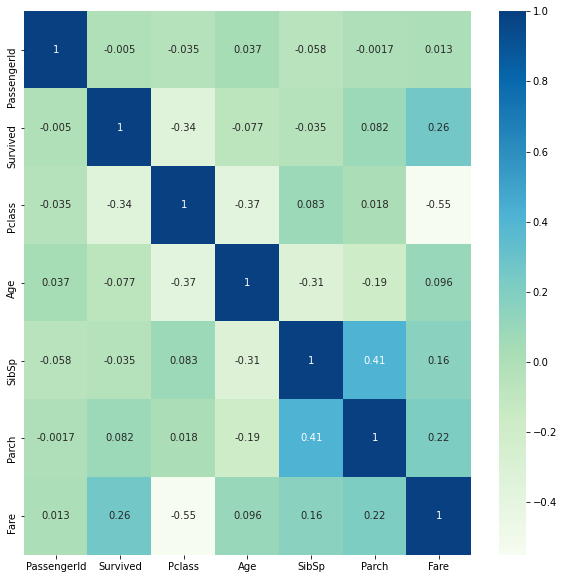

In [6]:
#correlation

plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),cmap = 'GnBu',annot=True)
plt.show()

c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\u

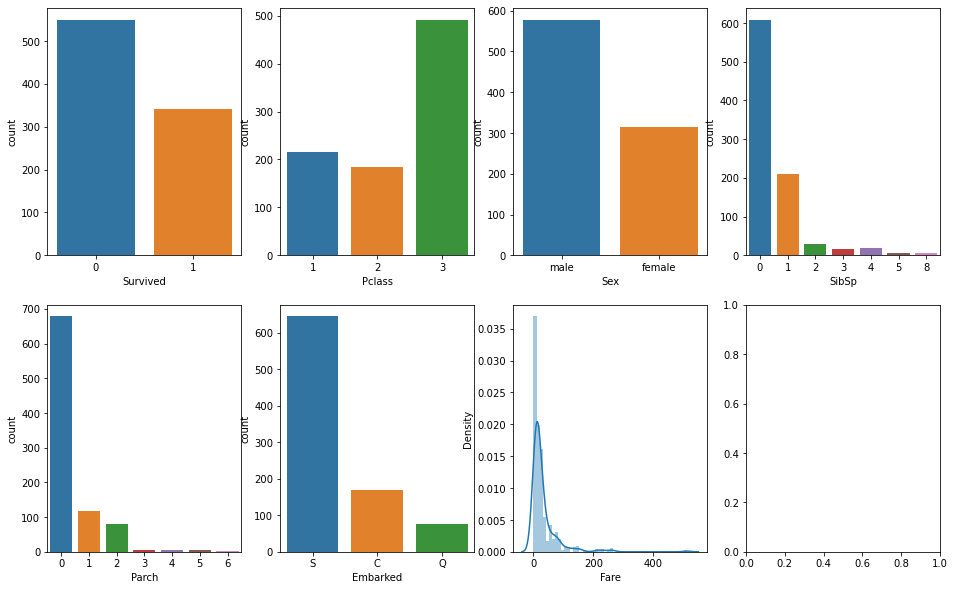

In [7]:
#count number

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Survived',data=df_train,ax=ax[0][0])
sns.countplot('Pclass',data=df_train,ax=ax[0][1])
sns.countplot('Sex',data=df_train,ax=ax[0][2])
sns.countplot('SibSp',data=df_train,ax=ax[0][3])
sns.countplot('Parch',data=df_train,ax=ax[1][0])
sns.countplot('Embarked',data=df_train,ax=ax[1][1])
sns.distplot(df_train['Fare'],kde=True,ax=ax[1][2])

plt.show()

In [8]:
'''
implies:
1. death more than lives
2. most people live in third class
3. male more than female
4. most people don't have siblings and spouse
5. most people don't have parch
6. most people embark at S 
7. most people pay 0~100 fare 
'''
print()

c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\u

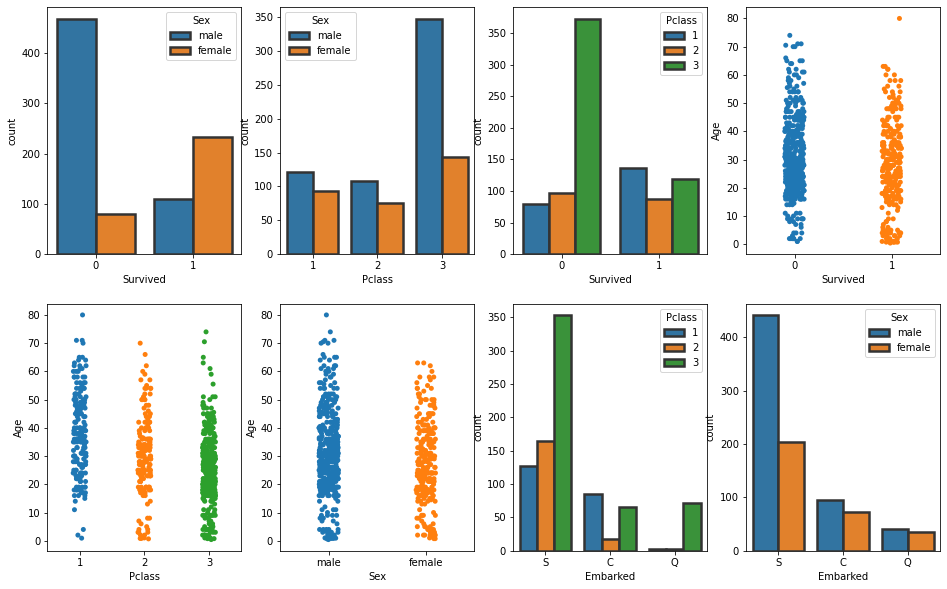

In [9]:
# survived Sex Age pclass Embarked

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Survived',hue='Sex',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[0][0])
sns.countplot('Pclass',hue='Sex',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[0][1])
sns.countplot('Survived',hue='Pclass',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[0][2])
sns.stripplot(x="Survived", y="Age", data=df_train,jitter=True,ax=ax[0][3])
sns.stripplot(x="Pclass", y="Age", data=df_train,jitter=True,ax=ax[1][0])
sns.stripplot(x="Sex", y="Age", data=df_train,jitter=True,ax=ax[1][1])
sns.countplot('Embarked',hue='Pclass',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[1][2])
sns.countplot('Embarked',hue='Sex',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[1][3])
plt.show()

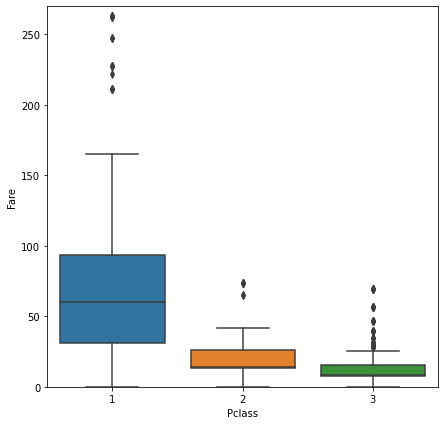

In [10]:
#pclass 3 is the cheapest
plt.figure(figsize=(7,7))
sns.boxplot(x='Pclass',y='Fare',data=df_train)
plt.ylim([0,270])
plt.show()

In [11]:
'''
implies:

1.male die the most
2.most male live in pclass 3
3.pclass 3 die the most
4.Age  20~40 die the most
5.most people in pclass 3 are in age 20~40
6.most male are in age 20~40
7.most people live in pclass 3 embarked at S
8.most male embarked at S

--> those who are male in age 20~40 live in pclass 3 embarked at S die the most

'''
print()

c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\u

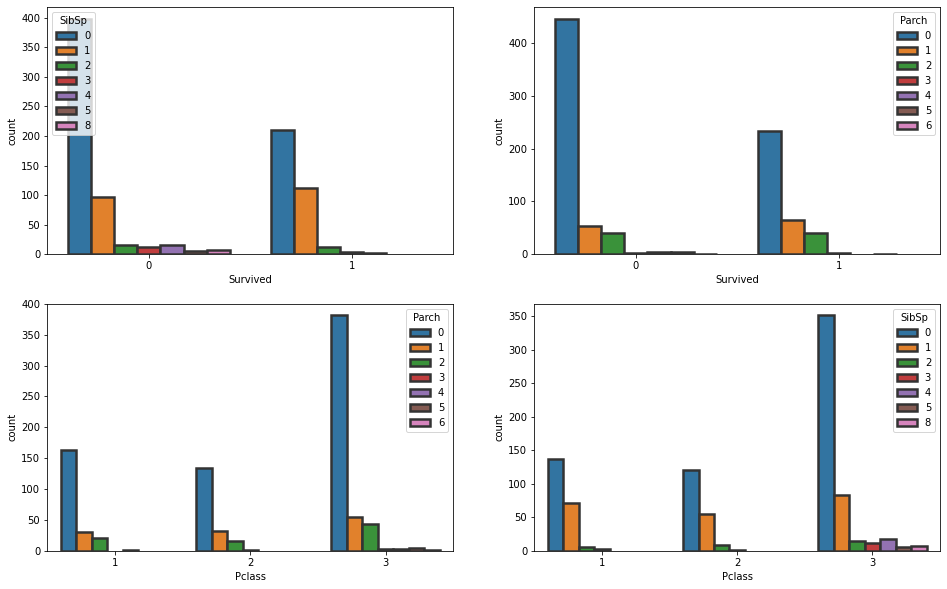

In [12]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot('Survived',hue='SibSp',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[0][0])
sns.countplot('Survived',hue='Parch',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[0][1])
sns.countplot('Pclass',hue='Parch',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[1][0])
sns.countplot('Pclass',hue='SibSp',linewidth=2.5,edgecolor=".2",data=df_train,ax=ax[1][1])

plt.show()

In [13]:
import re
#add name
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

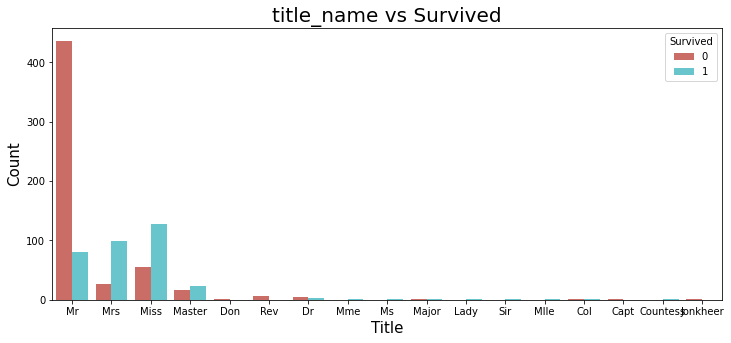

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='Title',data=df_train,palette='hls',hue='Survived')
plt.xlabel('Title',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('title_name vs Survived',fontsize=20)
plt.show()

Text(0.5, 1.0, 'pclass vs title_name')

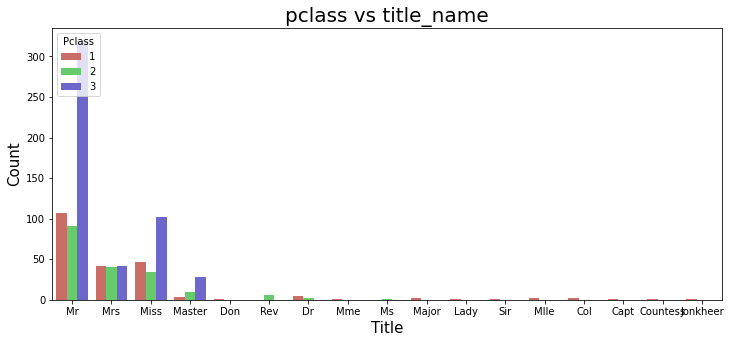

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='Title',data=df_train,palette='hls',hue='Pclass')
plt.xlabel('Title',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('pclass vs title_name',fontsize=20)

Text(0.5, 1.0, 'Embarked vs title_name')

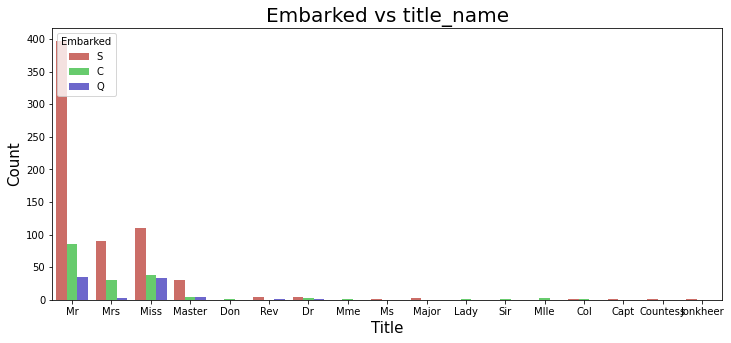

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='Title',data=df_train,palette='hls',hue='Embarked')
plt.xlabel('Title',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Embarked vs title_name',fontsize=20)

c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 250.0)]

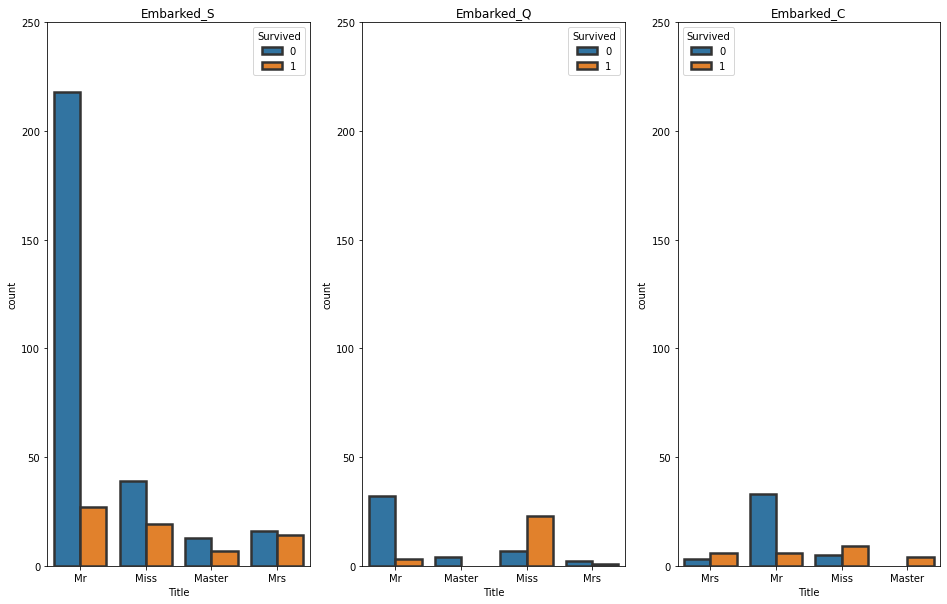

In [20]:
# Pclass 3 -----embarked at some place ,show Title vs Survived count

df=df_train[df_train.Title.str.contains('M')]
df_S=df[df.Embarked.str[0]=='S']
df_S=df_S[df_S.Pclass==3]
df_Q=df[df.Embarked.str[0]=='Q']
df_Q=df_Q[df_Q.Pclass==3]
df_C=df[df.Embarked.str[0]=='C']
df_C=df_C[df_C.Pclass==3]


fig,ax = plt.subplots(1,3,figsize=(16,10))
sns.countplot('Title',hue='Survived',linewidth=2.5,edgecolor=".2",data=df_S,ax=ax[0])
sns.countplot('Title',hue='Survived',linewidth=2.5,edgecolor=".2",data=df_Q,ax=ax[1])
sns.countplot('Title',hue='Survived',linewidth=2.5,edgecolor=".2",data=df_C,ax=ax[2])


ax[0].title.set_text('Embarked_S')
ax[0].set(ylim=(0, 250))
ax[1].title.set_text('Embarked_Q')
ax[1].set(ylim=(0, 250))
ax[2].title.set_text('Embarked_C')
ax[2].set(ylim=(0, 250))

# data process

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [19]:
#drop useless data
df_train_label=pd.DataFrame(df_train['Survived'])
df_train=df_train.drop(['Name','PassengerId','Cabin','Ticket','Survived'],axis=1,inplace=False)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [20]:
df_train.Age.fillna(df_train.Age.mean(),inplace=True)
df_train.Embarked.fillna('S',inplace=True)

In [21]:
#replace number to label
#sex:male,female ---0,1
#embarked:S,C,Q----0,1,2
#title
replace = LabelEncoder()

#sex
replace.fit(df_train.Sex)
Sex_label = replace.transform(df_train.Sex)
df_train['Sex_label'] = Sex_label
df_train.drop(['Sex'],axis=1,inplace=True)

#embarked
replace.fit(df_train.Embarked)
Embarked_label = replace.transform(df_train.Embarked)
df_train['Embarked_label'] = Embarked_label
df_train.drop(['Embarked'],axis=1,inplace=True)

#title
replace.fit(df_train.Title)
Title_label = replace.transform(df_train.Title)
df_train['Title_label'] = Title_label
df_train.drop(['Title'],axis=1,inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Sex_label       891 non-null    int32  
 6   Embarked_label  891 non-null    int32  
 7   Title_label     891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [23]:
df_train.head(9)

,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_label,Title_label
0,3,22.000000,1,0,7.2500,1,2,12
1,1,38.000000,1,0,71.2833,0,0,13
2,3,26.000000,0,0,7.9250,0,2,9
3,1,35.000000,1,0,53.1000,0,2,13
4,3,35.000000,0,0,8.0500,1,2,12
5,3,29.699118,0,0,8.4583,1,1,12
6,1,54.000000,0,0,51.8625,1,2,12
7,3,2.000000,3,1,21.0750,1,2,8
8,3,27.000000,0,2,11.1333,0,2,13


In [164]:
X=np.array(df_train)
y=np.array(df_train_label).astype(np.float32)
X.shape,y.shape

((891, 8), (891, 1))

In [165]:
#normalize
from sklearn.preprocessing import StandardScaler

normalize=StandardScaler()
X_=normalize.fit_transform(X)

In [166]:
X_.mean(),X_.std()

(2.6353778867364827e-17, 1.0)

c:\users\user\miniconda3\envs\bd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

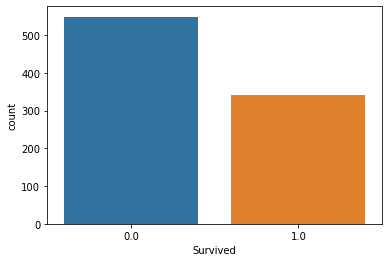

In [167]:
#the distribution of negative and positive sample is not extreme, so we use accuracy as metrics

sns.countplot('Survived',data=pd.DataFrame(y,columns=df_train_label.columns))

# build model

we use K-fold to evaluate model

# $logistic\ regression$

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [169]:
#tunning hyperparameters: C(lambda) , max_iter , random_state

reg=LogisticRegression()

params={
    'C':[0.5,1.0,1.2,1.5],
    'max_iter':[50,100,150],
    'random_state':[1,2,3,4]
}
grid=GridSearchCV(
    reg,
    params,
    cv=5,
    verbose=2,
    scoring='accuracy',
    refit=True
)
grid.fit(X_,y)
print("best score: {:.3f}, best params: {}".format(grid.best_score_, grid.best_params_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=3 ..............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\

[CV] ............... C=1.0, max_iter=50, random_state=2, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=4 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=4 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.0, max_iter=50, random_state=4 ..............................
[CV] ............... C=1.0, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.0, max_iter=100, random_state=1 .............................
[CV] .

c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] ............... C=1.2, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.2, max_iter=50, random_state=4 ..............................
[CV] ............... C=1.2, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=1 .............................
[CV] .............. C=1.2, max_iter=100, random_state=1, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=1 .............................
[CV] .............. C=1.2, max_iter=100, random_state=1, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=1 .............................
[CV] .............. C=1.2, max_iter=100, random_state=1, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=2 .............................
[CV] .............. C=1.2, max_iter=100, random_state=2, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=2 .............................
[CV] .............. C=1.2, max_iter=100, random_state=2, total=   0.0s
[CV] C=1.2, max_iter=100, random_state=2 .............................
[CV] .

c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] .............. C=1.5, max_iter=100, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=2 .............................
[CV] .............. C=1.5, max_iter=100, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=2 .............................
[CV] .............. C=1.5, max_iter=100, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=3 .............................
[CV] .............. C=1.5, max_iter=100, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=3 .............................
[CV] .............. C=1.5, max_iter=100, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=3 .............................
[CV] .............. C=1.5, max_iter=100, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=4 .............................
[CV] .............. C=1.5, max_iter=100, random_state=4, total=   0.0s
[CV] C=1.5, max_iter=100, random_state=4 .............................
[CV] .

c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\miniconda3\envs\bd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

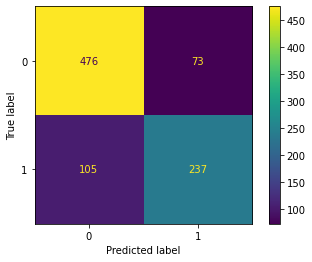

In [170]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_,X_,y,labels=[0,1])

# $deep\ learning$

In [171]:
#skorch method
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import RandomizedSearchCV

#pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [172]:
#model

#o-o-o-o-o

class logistic_network(nn.Module):
    def __init__(self,prob=0.5,num_units=8,n_f=8):
        super(logistic_network,self).__init__()
        self.input=nn.Linear(n_f,num_units)
        self.hidden=nn.Sequential(
            
            nn.Dropout(prob),
            
            nn.Linear(num_units,num_units),
            nn.BatchNorm1d(num_units),
            nn.ReLU(),
            
            nn.Dropout(prob),
            
            nn.Linear(num_units,num_units),
            nn.BatchNorm1d(num_units),
            nn.ReLU()
        )
        self.output=nn.Linear(num_units,1)
        self.initialize()
        
    def initialize(self):
        n=self.input.weight.shape[1]
        torch.nn.init.normal_(self.input.weight, mean=0, std=torch.sqrt(torch.tensor(2/n)))
        for layer in self.hidden:
            try:
                n=layer.weight.shape[1]
                torch.nn.init.normal_(layer.weight, mean=0, std=torch.sqrt(torch.tensor(2/n)))
            except:
                pass
        
    def forward(self,X):
        input_=F.relu(self.input(X))
        hidden=self.hidden(input_)
        out=self.output(hidden) #eat BCELogicLoss directly
        return out

In [173]:
#setting model

#theshold default:0.5
model = NeuralNetBinaryClassifier(
    logistic_network,
    max_epochs=100,
    lr=0.001,
    optimizer=optim.Adam, #optimizer
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    criterion=nn.BCEWithLogitsLoss,
    device=torch.device('cuda'),
)

In [174]:
#tunning hyperparameters: lr , num_unis , dropout prob , optimizer , max_epochs
X_=X_.astype('float32')
y_=y.squeeze().astype('float32')

# deactivate skorch-internal train-valid split and verbose logging
model.set_params(train_split=False, verbose=0)


params = {
    'lr': [10**(-4*np.random.rand()) for i in range(10)], 
    'max_epochs': [50,100],
    'module__num_units': [12,16],
    #'module__prob':[0.5],
    'optimizer__weight_decay':[0,0.001],
    #'optimizer':[optim.Adam,optim.SGD,optim.RMSprop]
}

#cvint, cross-validation generator or an iterable
#cv=kfold(3),default 5
#metric:accuracy
gs =RandomizedSearchCV(model, params, refit=True, cv=5, scoring='accuracy', verbose=2)

gs.fit(X_, y_)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993, total=   1.5s
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993, total=   1.5s
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993 
[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993, total=   1.5s
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993 
[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993, total=   1.4s
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993 
[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=50, lr=0.00012848378793001993, total=   1.4s
[CV] optimizer__weight_decay=0.001, module__num_units=16, max_epochs=100, lr=0.20879103361611484 
[CV]  optimizer__weight_decay=0.001, module__num_units=16, max_epochs=100, lr=0.20879103361611484, total=   2.9s
[CV] optimizer__weight_decay=0.001, module__num_units=16,

[CV]  optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544, total=   3.6s
[CV] optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544 
[CV]  optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544, total=   3.3s
[CV] optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544 
[CV]  optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544, total=   3.3s
[CV] optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544 
[CV]  optimizer__weight_decay=0.001, module__num_units=12, max_epochs=100, lr=0.07781710719306544, total=   3.3s
[CV] optimizer__weight_decay=0, module__num_units=12, max_epochs=100, lr=0.11717152150513566 
[CV]  optimizer__weight_decay=0, module__num_units=12, max_epochs=100, lr=0.11717152150513566, total=   3.2s
[CV] optimizer__weight_decay=0, module__num_units=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


best score: 0.819, best params: {'optimizer__weight_decay': 0, 'module__num_units': 16, 'max_epochs': 50, 'lr': 0.009364075620568993}


In [175]:
final_model=gs.best_estimator_

In [176]:
#compare logistic regression and network
print('logistic regression--',grid.best_estimator_.score(X_,y_))
print('logistic network--',final_model.score(X_,y))

logistic regression-- 0.8002244668911336
logistic network-- 0.8428731762065096


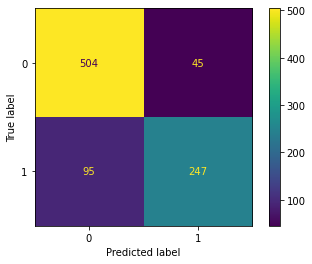

In [177]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model,X_,y_,labels=[0,1])

In [178]:
#save model
torch.save(final_model.module_,'titanic_model.pkl')

In [179]:
model_titanic=torch.load('titanic_model.pkl').cpu()

# submit

In [180]:
df_test=pd.read_csv('./data/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [181]:
# process 
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [182]:
df_test.Age.fillna(df_test.Age.mean(),inplace=True)
df_test.Embarked.fillna('S',inplace=True)
df_test.Fare.fillna(df_test.Fare.mean(),inplace=True)

In [183]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [184]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.50000,0,0,7.8292,Q,Mr
1,3,female,47.00000,1,0,7.0000,S,Mrs
2,2,male,62.00000,0,0,9.6875,Q,Mr
3,3,male,27.00000,0,0,8.6625,S,Mr
4,3,female,22.00000,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,Mr
414,1,female,39.00000,0,0,108.9000,C,Dona
415,3,male,38.50000,0,0,7.2500,S,Mr
416,3,male,30.27259,0,0,8.0500,S,Mr


In [185]:
df_test.Title[df_test.Title=='Dona']='Don'

c:\users\user\miniconda3\envs\bd\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
#replace number to label
#sex:male,female ---0,1
#embarked:S,C,Q----0,1,2
#title
replace_ = LabelEncoder()

#sex
replace_.fit(df_test.Sex)
Sex_label = replace_.transform(df_test.Sex)
df_test['Sex_label'] = Sex_label

#embarked
replace_.fit(df_test.Embarked)
Embarked_label = replace_.transform(df_test.Embarked)
df_test['Embarked_label'] = Embarked_label

#title
Title_label =  replace.transform(df_test.Title)
df_test['Title_label'] = Title_label

In [187]:
df_test.drop(['Title','Sex','Embarked'],axis=1,inplace=True)

In [188]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_label,Title_label
0,3,34.50000,0,0,7.8292,1,1,12
1,3,47.00000,1,0,7.0000,0,2,13
2,2,62.00000,0,0,9.6875,1,1,12
3,3,27.00000,0,0,8.6625,1,2,12
4,3,22.00000,1,1,12.2875,0,2,13
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,2,12
414,1,39.00000,0,0,108.9000,0,0,3
415,3,38.50000,0,0,7.2500,1,2,12
416,3,30.27259,0,0,8.0500,1,2,12


In [189]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_label       418 non-null    int32  
 6   Embarked_label  418 non-null    int32  
 7   Title_label     418 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 21.4 KB


In [190]:
#normalize
normal= StandardScaler()

X_test=np.array(df_test)

normal.fit(X_test)
X_test_norm=normal.transform(X_test)
X_test_norm=X_test_norm.astype(np.float32)

In [191]:
Survived=final_model.predict(X_test_norm).squeeze().astype('int32')

In [192]:
#submit
PassengerId = np.arange(892,1310)

submit = pd.DataFrame(list(zip(PassengerId,Survived)),columns=['PassengerId','Survived'])

In [193]:
submit.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [194]:
submit.to_csv("final_ans_new.csv",index=False)